In [1]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

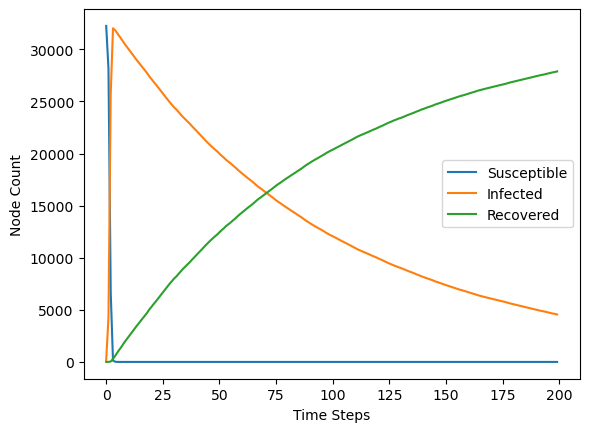

In [12]:
# Load the network from a CSV file
csv_file_path = "data - fixed numbers.csv"  # Replace with your CSV file path
edge_df = pd.read_csv(csv_file_path,delimiter=' ')

# Create a graph from the CSV edge list
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')
nx.set_node_attributes(G, "S", "state")  # Set all nodes as Susceptible

# Parameters for SIR model
infection_prob = 1
recovery_prob = 0.01
initial_infected = [1]  # Start with node 1 infected (adjust as needed)

# Set the initial infected nodes
for node in initial_infected:
    G.nodes[node]["state"] = "I"

# Prepare lists to track counts over time
susceptible_counts, infected_counts, recovered_counts = [], [], []

# Simulation
for step in range(200):  # Run for 50 steps
    new_infected, new_recovered = [], []
    
    for node in G.nodes:
        if G.nodes[node]["state"] == "I":
            # Attempt to infect neighbors
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                    new_infected.append(neighbor)
            # Attempt recovery
            if random.random() < recovery_prob:
                new_recovered.append(node)
                
    # Update states
    for node in new_infected:
        G.nodes[node]["state"] = "I"
    for node in new_recovered:
        G.nodes[node]["state"] = "R"
    
    # Track the number of nodes in each state
    susceptible_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "S"))
    infected_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "I"))
    recovered_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "R"))

# Plot the results
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Node Count")
plt.legend()
plt.show()
